# Dataset Loading with TSGM

In [5]:
%load_ext autoreload
%autoreload 2

import tsgm
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tsgm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Collection of Datasets

TSGM offers a collection of over 140 time series datasets. You can find the full list of available datasets in the [TSGM documentation](https://tsgm.readthedocs.io/en/latest/guides/datasets.html) and in the corresponding section in [README.md](https://github.com/AlexanderVNikitin/tsgm?tab=readme-ov-file#floppy_disk-datasets).Here, we will look at a few of the most frequently used datasets as examples.

#### UCR datasets [1]

The [UCR](https://www.cs.ucr.edu/~eamonn/time_series_data_2018/) repository hosts various time series datasets, and TSGM provides easy access to those datasets. Let's consider [ECG200](https://timeseriesclassification.com/description.php?Dataset=ECG200).

In [9]:
ucr_manager = tsgm.utils.UCRDataManager(ds="ECG200")
X_train, y_train, X_test, y_test = ucr_manager.get()
print("Train Data: ", X_train.shape, y_train.shape)
print("Test Data: ", X_test.shape, y_test.shape)
print("Unique Labels: ", set(list(y_train) + list(y_test)))

Train Data:  (100, 96) (100,)
Test Data:  (100, 96) (100,)
Unique Labels:  {1, -1}


Each series in the ECG200 dataset represents the electrical activity recorded during a single heartbeat. The dataset is divided into two classes: normal heartbeats and those indicating a myocardial infarction. It includes 100 time series samples for training and 100 for testing, with each series comprising 96 time steps. Let’s visualize the training data over time to better understand its structure.

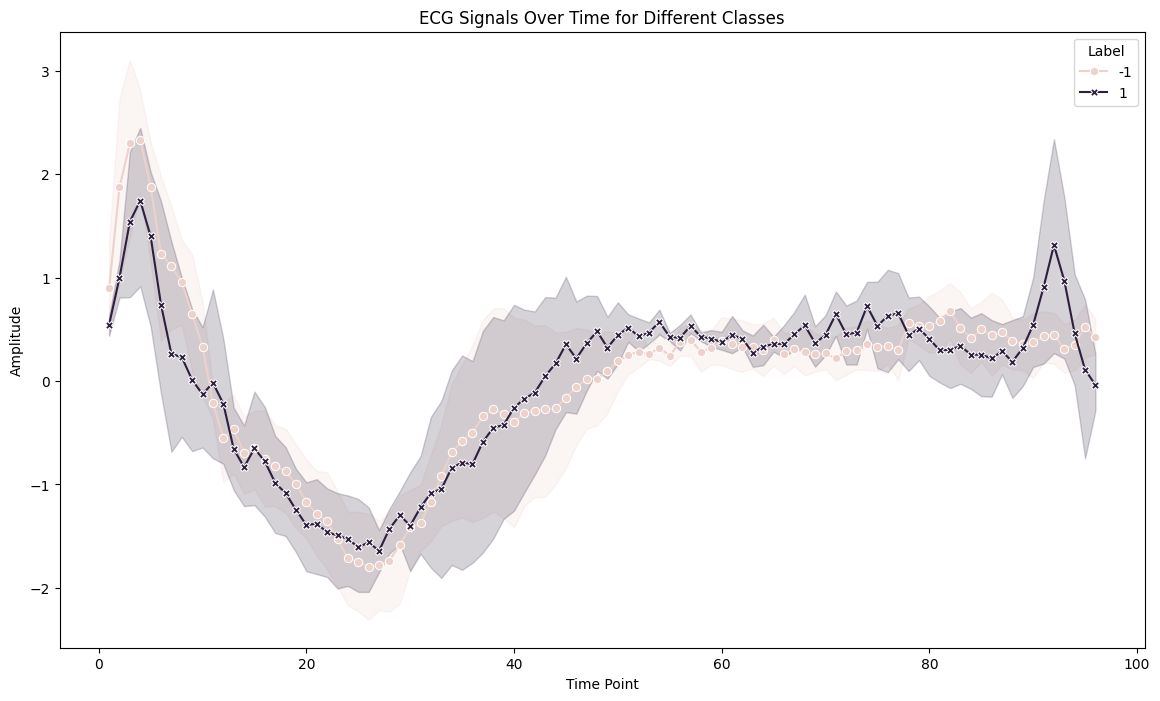

In [11]:
df = pd.DataFrame(X_train, columns=[f'Time_{i+1}' for i in range(X_train.shape[1])])
df['Label'] = y_train

# Sample a few signals from each class to plot (5 samples per class)
sampled_df = df.groupby('Label').apply(lambda x: x.sample(5)).reset_index(drop=True)

melted_df = sampled_df.melt(id_vars='Label', var_name='Time', value_name='Amplitude')
melted_df['Time'] = melted_df['Time'].str.replace('Time_', '').astype(int)

# Plot the line plots
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df, x='Time', y='Amplitude', hue='Label', style='Label', markers=True, dashes=False)
plt.title('ECG Signals Over Time for Different Classes')
plt.xlabel('Time Point')
plt.ylabel('Amplitude')
plt.show()


#### EEG Eye State [2]

Let's explore the [EEG Eye State](https://archive.ics.uci.edu/dataset/264/eeg+eye+state) dataset using TSGM. This dataset consists of 14,980 time steps, each with 14 features. Each time step is labeled as either 0 (indicating an eye-open state) or 1 (indicating an eye-closed state).

In [7]:
X, y = tsgm.utils.get_eeg()
print(X.shape, y.shape)

(14980, 14) (14980,)


Let's visualize the correlation matrix between the channels.

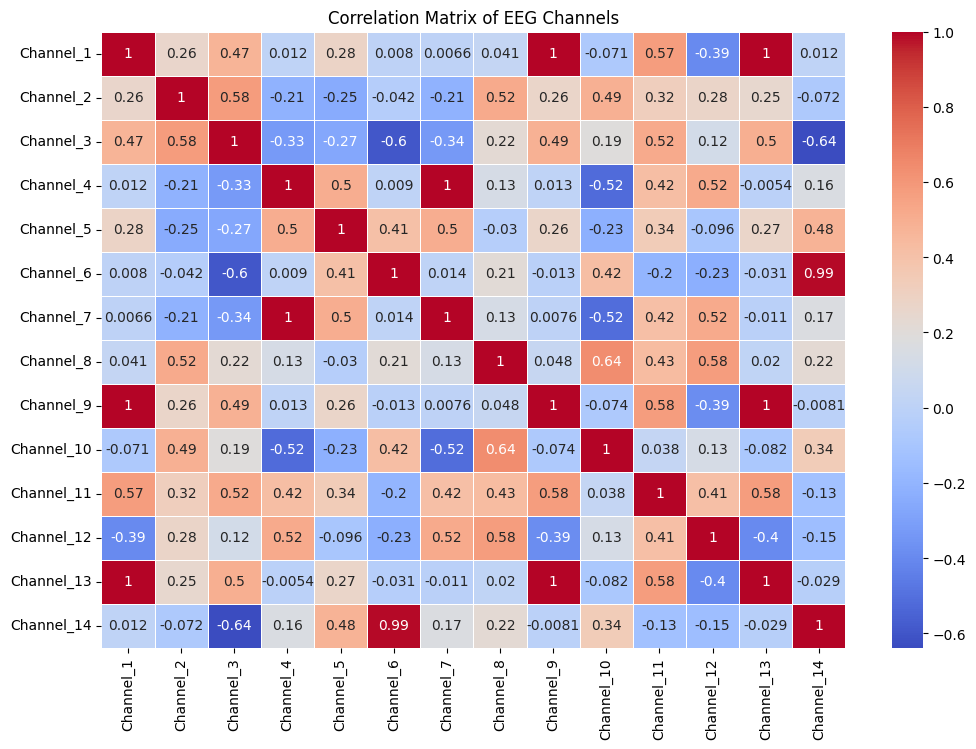

In [8]:
df = pd.DataFrame(X, columns=[f'Channel_{i+1}' for i in range(X.shape[1])])

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of EEG Channels')
plt.show()

#### Physionet 2012 [3]

Another example is the Physionet2012 dataset, which is used to predict the mortality of patients in the Intensive Care Unit (ICU) based on data collected during the first two days of their ICU stay.

In [13]:
train_X, train_y, test_X, test_y, val_X, val_y = tsgm.utils.get_physionet2012()
print("Train data: ", train_X.shape, train_y.shape)
print("Test data: ", test_X.shape, test_y.shape)
print("Val data: ", val_X.shape, val_y.shape)

INFO:utils:Using downloaded dataset from physionet2012


Train data:  (1757980, 4) (4000, 6)
Test data:  (1762535, 4) (4000, 6)
Val data:  (1765303, 4) (4000, 6)


In [19]:
train_X.head(3)

,time,parameter,value,recordid
0,00:00,RecordID,132592,132592
1,00:00,Age,35,132592
2,00:00,Gender,0,132592


The dataframes contain measurements from the ICU unit, where `recordid` serves as a unique identifier for each ICU stay.

In [20]:
train_y.head(3)

,recordid,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,132539,6,1,5,-1,0
1,132540,16,8,8,-1,0
2,132541,21,11,19,-1,0


## References
[1] Dau, H.A., Bagnall, A., Kamgar, K., Yeh, C.C.M., Zhu, Y., Gharghabi, S., Ratanamahatana, C.A. and Keogh, E., 2019. The UCR time series archive. IEEE/CAA Journal of Automatica Sinica, 6(6), pp.1293-1305.

[2] Roesler,Oliver. (2013). EEG Eye State. UCI Machine Learning Repository. https://doi.org/10.24432/C57G7J.

[3] Goldberger, A., Amaral, L., Glass, L., Hausdorff, J., Ivanov, P. C., Mark, R., ... & Stanley, H. E. (2000). PhysioBank, PhysioToolkit, and PhysioNet: Components of a new research resource for complex physiologic signals. Circulation [Online]. 101 (23), pp. e215–e220.